# GR5242 HW2 Zihan Zhou (zz2573)

## Problem 1

### a)
The hidden sequence of variables $\{Z_i\}$ is a Markov chain with state space $\{1,2,\dots,K\}$, representing the topic the $i^{th}$ word belongs to. It has an initial distribution $Q_{init} = (\theta_1, \dots, \theta_K)$, and a transition matrix ${\bf q}$ with $q_{ij} = 0.99{\bf I}_{\{i=j\}} + \frac{0.01}{K-1}{\bf I}_{\{i \ne j\}}$, $i,j = 1, 2, \dots, K$.

The observed variables are the word sequence $X_1, X_2, \dots$. The sample space is the whole corpus, and the emission probability $P(\cdot|Z_i) \ (i=1,\dots, K)$ is the probability of each word appearing given the topic $Z_i$.

### b)
The two variables are conditionally independent given the states of $Z_i$ and $Z_{i+2}$, but are stochastically dependent, if we do not have information about $Z_i$ and $Z_{i+2}$.


## Problem 2

### a)
Likewise we define $\mu_{-i} = \{\mu_1, \dots, \mu_{i-1}, \mu_{i+1}, \dots, \mu_d\}$, $\Sigma_{-i,-i}$ by removing the $i^{th}$ row and the $i^{th}$ column from $\Sigma$, $\Sigma_{i, -i} = (\sigma_{1i}, \dots, \sigma_{(i-1)i}, \sigma_{(i+1)i}, \dots, \sigma_{di})'$. 

Then $x_i|x_{-i}$ follows a normal distribution, with mean
\begin{equation}
\mu_i + \Sigma_{i,-i}'\Sigma_{-i}^{-1}(x_{-i} - \mu_{-i})
\end{equation}

and variance
\begin{equation}
\sigma_{ii} - \Sigma_{i,-i}'\Sigma_{-i}^{-1}\Sigma_{i,-i}
\end{equation}.

### b)
Given we know $X_{-i}$, the states except for $X_i$, the full conditionals are
\begin{equation}
P(X_i = 1|X_{-i}) = P(X_i=1|X_{i-1}) = \sigma(\theta_iX_{i-1}), P(X_i=0|X_{-i}) = 1-\sigma(\theta_iX_{i-1})
\end{equation}

## Problem 3

### (1) Gaussian

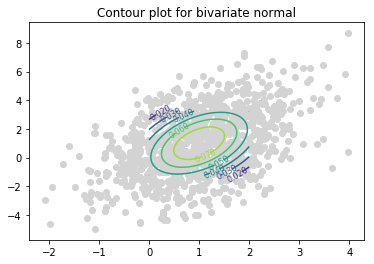

In [15]:
import numpy as np
import math
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

def Gibbs_sampler(N, mu, sigma): 
    # Gaussian with mean mu & covariance matrix sigma, N samples
    d = len(mu)
    init = np.random.multivariate_normal(mu, sigma, size = 1)
    conditions = init[0]
    n = 0
    output = np.array(conditions)
    
    while n < (N-1):
        for i in range(d):
            covs = np.delete(sigma[i,:], i)
            cov_matrix = np.delete(sigma, i, 0)
            cov_matrix = np.delete(cov_matrix, i, 1)
            cond_mu = mu[i] + covs @ np.linalg.inv(cov_matrix) @ \
                      (np.delete(conditions, i) - np.delete(mu, i))
            cond_var = sigma[i,i] - covs @ np.linalg.inv(cov_matrix) @ covs.transpose()
            new_entry = np.random.normal(cond_mu, math.sqrt(cond_var), 1)
            conditions[i] = new_entry
        
        output = np.vstack((output, conditions))
        n += 1
    
    return(output)
  
mu = [1,1]
sigma = np.array([[1,1],[1,5]])
gibbs_sample = Gibbs_sampler(1000, mu, sigma)
variable = mvn(mu, sigma)

x = np.linspace(0, 2, 500)
y = np.linspace(1-math.sqrt(5), 1+math.sqrt(5), 500)
X, Y = np.meshgrid(x, y)
pos = np.array([X.flatten(),Y.flatten()]).T
Z = variable.pdf(pos).reshape(500, 500)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, alpha = 1)
ax.clabel(CS, inline = 1, fontsize = 8)
ax.scatter(gibbs_sample[:,0], gibbs_sample[:,1], c = "lightgrey")
ax.set_title("Contour plot for bivariate normal")
plt.show()

### (2) Directed Graphical Model

<BarContainer object of 6 artists>

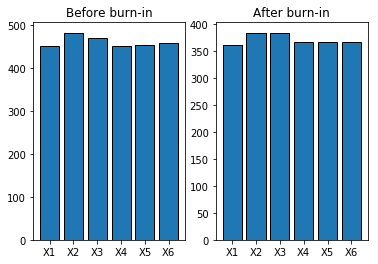

In [18]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

def sigmoid(x):
    y = 1 / (1 + math.exp(-x))
    return y 

def Gibbs_sampler2(N):
    output = list()
    prob = 0.5 # initialize
    
    for n in range(6 * N):
        current = np.random.binomial(n = 1, p = prob)
        output.append(current)
        prob = sigmoid(1/3 * current)
    
    output = np.array(output).reshape(N, 6)
    return output
  
sample = Gibbs_sampler2(1000)
  
df = pd.DataFrame({"X1": sample[:,0], "X2": sample[:,1], "X3": sample[:,2],
                   "X4": sample[:,3], "X5": sample[:,4], "X6": sample[:,5]})

labels = df.columns

# Before burn-in

df_count = list()
for col in df.columns:
    count = (df[col].values == 0).sum()
    df_count.append(count)
pos = np.arange(len(labels))
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.set_xticks(pos)
ax.set_xticklabels(labels)
ax.set_title("Before burn-in")
plt.bar(pos, df_count, edgecolor = 'black')

# After burn-in
burnin = 200
df_count1 = list()
for col in df.columns:
    count = (df[col][burnin:].values == 0).sum()
    df_count1.append(count)
pos = np.arange(len(labels))
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_xticks(pos)
ax1.set_xticklabels(labels)
ax1.set_title("After burn-in")
plt.bar(pos, df_count1, edgecolor = 'black')

We can see from the barplot that after burn-in, the distribution seems to be more flat.